# Vaccine Project

## Business Understanding

The client is a leader in the field of health care.  The client has resources at their disposal that can be used to encourage non-vaccinated persons to become vaccinated. It would be beneficial to the client to know what groups of persons are less likely to be vaccinated in order to make the best use of the client's resources.  Therefore, it would be helpful for the client to have a model that could predict which persons are less likely to be vaccinated based on various known factors, related to the person's background, views and behaviors, and also it would be helpful to know more generally which of these factors leads a group to be less or more likely to be vaccinated.  This model and knowledge would facilitate efforts to reach persons individually and as groups in order to efficiently encourage vaccination. 

## Data Understanding

The data comes from the National 2009 H1N1 Flu Survey conducted by the United States after the outbreak of the virus in 2009.  The survey covers various topics included one's background, views and behaviors.  The survey also covers whether one has been vaccinated against the H1N1 virus, which will be the target variable for this project. 
More specifically, the potential predictor variables include socio-economic related factors, views about vaccines, and health-related behaviors and statuses (e.g., health insurance and doctor recommendation.) Given that H1N1 can be categorized as a risky virus, the data, though H1N1 specific, can be thought of as analagous to any risky virus such that insights from the data will be applicable to future viral outbreaks. 

About half the features are categorical in nature as opposed to numerical. (Of the float and integer type features, about half are binary/categorical.)  The columns with most missing data have about 10,000 of 27,000 missing.  About 21% of respondents received the H1N1 vaccine. 


Features with signficant correlation to the target variable are doctor reccomendation, opinion of virus risk, and opinion of vaccine effective.

See the [data](./data).



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataX = pd.read_csv('./data/training_set_features.csv') 
datay = pd.read_csv('./data/training_set_labels.csv')
dataX.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
datay.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Combining the feature and label data into one dataframe: 

In [4]:
data = pd.concat([datay, dataX], axis = 1)

Drop unneeded columns including those specific to the seasonal flu.

In [5]:
data = data.drop(['respondent_id', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'doctor_recc_seasonal', 'seasonal_vaccine'], axis=1)

In [6]:
data.head()

,h1n1_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
data.describe()

,h1n1_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26458.000000,26458.000000
mean,0.212454,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,0.886499,0.534583
std,0.409052,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,1.000000,1.000000
max,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
data.iloc[:,8:17].describe()

,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk
count,26625.000000,26579.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000
mean,0.337315,0.677264,0.220312,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566
std,0.472802,0.467531,0.414466,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000


Of the float and integer type features, about half are binary/categorical.  The columns with most missing data have about 10,000 of 27,000 missing.  About 21% of respondents received the H1N1 vaccine. 

Some of the columns are not self-explanatory: census_msa, hhs_geo_region. 

In [10]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

Metropolitan Statistical Area, it seems that these designation roughly mean: {MSA, Not Principle  City: suburban; MSA, Principle City: urban; Non-MSA: rural }

hhs_geo_region, employment_industry, and employment_occupation are coded as random strings.  Thus without decoding, they will provide little information.

In [11]:
data.hhs_geo_region.value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [12]:
data.employment_industry.value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [13]:
data.employment_occupation.value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [14]:
data.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [15]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [16]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [17]:
data.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [18]:
data.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

The survey seems to be fairly cross-sectional in terms of various background factors. 

Check correlations with target variable and for multicollinearity.

<AxesSubplot:>

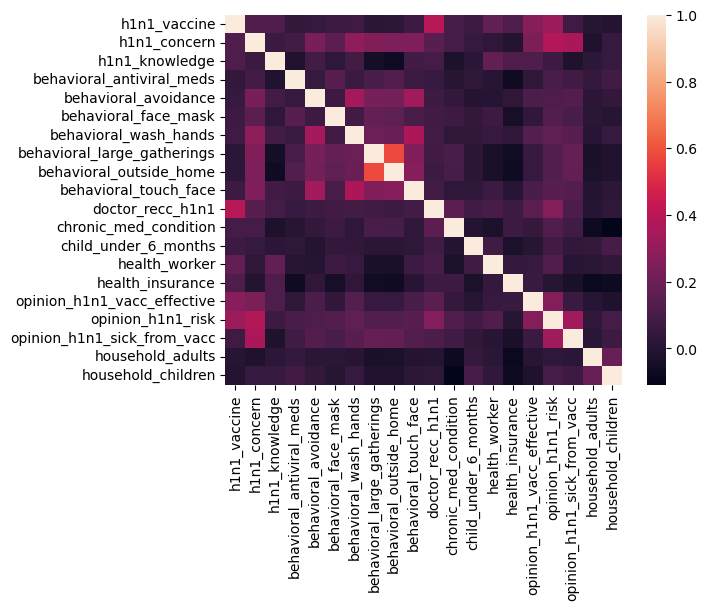

In [19]:
sns.heatmap(data.corr())

Create dummy variables for each categorical variable so correlations/other calculations can be made.

In [20]:
datawd = pd.get_dummies(data)

In [21]:
datawd.head()

,h1n1_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

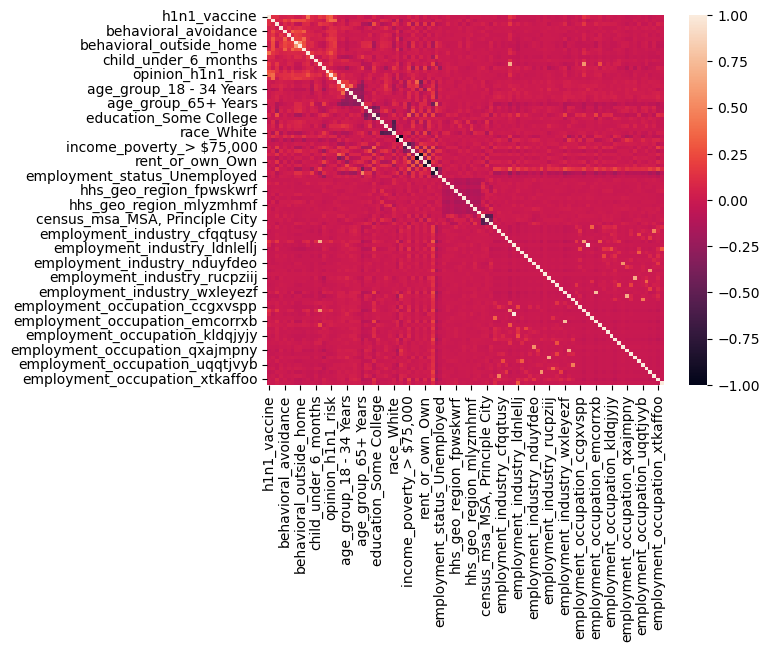

In [22]:
sns.heatmap(datawd.corr())

Find all correlations over .25:

In [23]:
datawdcor = datawd.corr()

In [24]:
corrs=[]

for i in range(len(datawdcor)):#iter over rows
    for j in range(len(datawdcor)):#iter over cols
        if abs((datawdcor[datawdcor.columns[i]][datawdcor.columns[j]])>.25) & (datawdcor[datawdcor.columns[i]][datawdcor.columns[j]] !=1.0):
            tup = datawdcor[datawdcor.columns[i]][datawdcor.columns[j]],datawdcor.columns[i], datawdcor.columns[j]
            corrs.append(tup)
corrs    
    

[(0.39389048123870213, 'h1n1_vaccine', 'doctor_recc_h1n1'),
 (0.26934700167297715, 'h1n1_vaccine', 'opinion_h1n1_vacc_effective'),
 (0.32326466034778245, 'h1n1_vaccine', 'opinion_h1n1_risk'),
 (0.2935651485017993, 'h1n1_concern', 'behavioral_wash_hands'),
 (0.2550310154400835, 'h1n1_concern', 'behavioral_large_gatherings'),
 (0.3770328126230567, 'h1n1_concern', 'opinion_h1n1_risk'),
 (0.3600697383652842, 'h1n1_concern', 'opinion_h1n1_sick_from_vacc'),
 (0.26208698574014516, 'h1n1_knowledge', 'education_College Graduate'),
 (0.3381295192965343, 'behavioral_avoidance', 'behavioral_wash_hands'),
 (0.3353354496707589, 'behavioral_avoidance', 'behavioral_touch_face'),
 (0.2935651485017993, 'behavioral_wash_hands', 'h1n1_concern'),
 (0.3381295192965343, 'behavioral_wash_hands', 'behavioral_avoidance'),
 (0.36506407130000645, 'behavioral_wash_hands', 'behavioral_touch_face'),
 (0.2550310154400835, 'behavioral_large_gatherings', 'h1n1_concern'),
 (0.5840845791409999,
  'behavioral_large_gather

In [25]:
#Convert list of tuples to DF.
corrlist =[]
var1 =[]
var2 =[]
for i in corrs:
    corrlist.append(i[0])
    var1.append(i[1])
    var2.append(i[2])
corrdf = pd.DataFrame([corrlist,var1, var2]).transpose()        

Find signficant correlations with target variable.

In [26]:
corrdf.loc[(corrdf[1]=='h1n1_vaccine')|(corrdf[2]=='h1n1_vaccine')]

,0,1,2
0,0.39389,h1n1_vaccine,doctor_recc_h1n1
1,0.269347,h1n1_vaccine,opinion_h1n1_vacc_effective
2,0.323265,h1n1_vaccine,opinion_h1n1_risk
22,0.39389,doctor_recc_h1n1,h1n1_vaccine
27,0.269347,opinion_h1n1_vacc_effective,h1n1_vaccine
29,0.323265,opinion_h1n1_risk,h1n1_vaccine


Significant correlations are: Doctor reccomendation, opinion of virus risk, opinion of vaccine effective.

Check these potential predictors correlations amongst each other

In [27]:
corrdf.tail(30)

,0,1,2
66,0.254746,employment_industry_ldnlellj,employment_occupation_kldqjyjy
67,0.29149,employment_industry_ldnlellj,employment_occupation_xzmlyyjv
68,0.313859,employment_industry_mcubkhph,employment_occupation_ukymxvdu
69,0.547199,employment_industry_nduyfdeo,employment_occupation_pvmttkik
70,0.57704,employment_industry_pxcmvdjn,employment_occupation_xgwztkwe
71,0.676177,employment_industry_rucpziij,employment_occupation_tfqavkke
72,0.352989,employment_industry_saaquncn,employment_occupation_vlluhbov
73,0.270303,employment_industry_vjjrobsf,employment_occupation_oijqvulv
74,0.265018,employment_industry_wxleyezf,employment_status_Employed
75,0.765692,employment_industry_wxleyezf,employment_occupation_emcorrxb


The potential predictor variables are not highly correlated amonst each other.

# Data preparation

Separate predictor variables and target variables from unused data, fill in missing values and then split both into train and test sets.  

In [28]:
from sklearn.model_selection import train_test_split

In [29]:

dataPT= datawd.loc[:,['doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'h1n1_vaccine']]

In [30]:
dataPT.describe()

,doctor_recc_h1n1,opinion_h1n1_risk,opinion_h1n1_vacc_effective,h1n1_vaccine
count,24547.000000,26319.000000,26316.000000,26707.000000
mean,0.220312,2.342566,3.850623,0.212454
std,0.414466,1.285539,1.007436,0.409052
min,0.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,0.000000,2.000000,4.000000,0.000000
75%,0.000000,4.000000,5.000000,0.000000
max,1.000000,5.000000,5.000000,1.000000


In [31]:
#len(X.loc[X.doctor_recc_h1n1.notna() & X.opinion_h1n1_risk.notna() & X.opinion_h1n1_vacc_effective.notna()])

In [32]:
dataPT = dataPT.dropna(axis=0)

In [33]:
dataPT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24246 entries, 0 to 26706
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_h1n1             24246 non-null  float64
 1   opinion_h1n1_risk            24246 non-null  float64
 2   opinion_h1n1_vacc_effective  24246 non-null  float64
 3   h1n1_vaccine                 24246 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 947.1 KB


In [34]:
y = dataPT['h1n1_vaccine']
X= dataPT.drop('h1n1_vaccine',axis=1)

In [35]:
np.shape(y), np.shape(X)

((24246,), (24246, 3))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
np.shape(X_test), np.shape(y_train)

((6062, 3), (18184,))

# Data Modeling

In the data modeling section, I start from a baseline logistic regression using three features and the response variable (whether the person has received the H1N1 vaccine).  From there, I explore non-parametric models, starting with a fairly simple decision tree model.  Based on the the results from this model, a more complex tree model is fitted and evaluated.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
reg = LogisticRegression(C=1e5, solver = "liblinear") 

In [40]:
reg.fit(X_train, y_train)

LogisticRegression(C=100000.0, solver='liblinear')

Check accuracies below:

In [41]:
reg.score(X_train, y_train)

0.817146942366916

In [42]:
reg.score(X_test, y_test)

0.8211811283404817

In [43]:
reg.decision_function(X_test)

array([-2.04709364, -2.04709364, -2.72000579, ..., -1.79958004,
       -2.04709364, -2.47249219])

In [44]:
reg.coef_

array([[1.67491008, 0.42539856, 0.67291215]])

Doctor recommendation appears to be the most important feature

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
y_test_preds = reg.predict(X_test)
cm = confusion_matrix(y_test, y_test_preds)


In [47]:
cm

array([[4450,  266],
       [ 818,  528]], dtype=int64)

The number of false positives, 259, seems material but low, given the roughly 27,000 predicitions.

## Non-parametric model : Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [50]:
tree = tree.fit(X_train, y_train)

In [51]:
tree.score(X_train, y_train)

0.8180268367795864

In [52]:
tree.score(X_test, y_test)

0.8211811283404817

Accuracy scores are very similar for test and train set (also to logistic regression).  Since there does not appear to be any overfitting, it may make sense to build a more complex tree to try to pick up on more patters in the training set.

In [53]:
y_tepreds_t = tree.predict(X_test)
cm_t =  confusion_matrix(y_test, y_tepreds_t)
cm_t

array([[4428,  288],
       [ 796,  550]], dtype=int64)

In [54]:
tree_big = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10) # The maximum depth of the tree is increased from 5 to 10 to allow for more nodes, splits, and leaves to allow for greater capture of patterns.

In [55]:
tree_big =  tree_big.fit(X_train, y_train) 

In [56]:
tree_big.score(X_train, y_train)

0.818246810382754

In [57]:
tree_big.score(X_test, y_test)

0.8215110524579347

The accuracy scores in this more complex tree are highly similar to the initial tree, however the training score has slightly improved while the test score has remained exactly the same.  This suggests that we now have a marginally improved model. 

In [58]:
tree_big.feature_importances_

array([0.5473948 , 0.24377929, 0.20882591])

<BarContainer object of 3 artists>

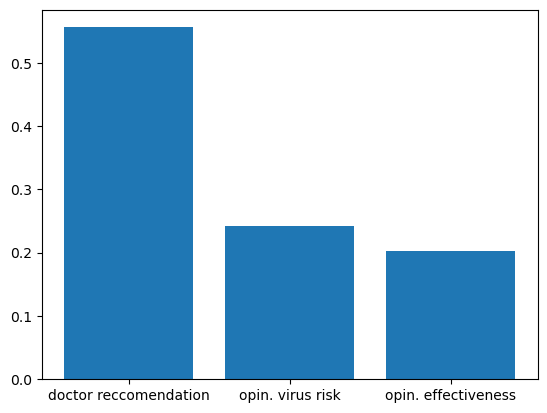

In [59]:
plt.bar(['doctor reccomendation', 'opin. virus risk', 'opin. effectiveness'], [0.55599157, 0.24206617, 0.20194226])

Doctor recommendation appears to be the most important feature

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

In [61]:
y_tepreds_t_big = tree_big.predict(X_test)

In [62]:
cm_t_big =  confusion_matrix(y_test, y_tepreds_t_big)
cm_t_big

array([[4435,  281],
       [ 801,  545]], dtype=int64)

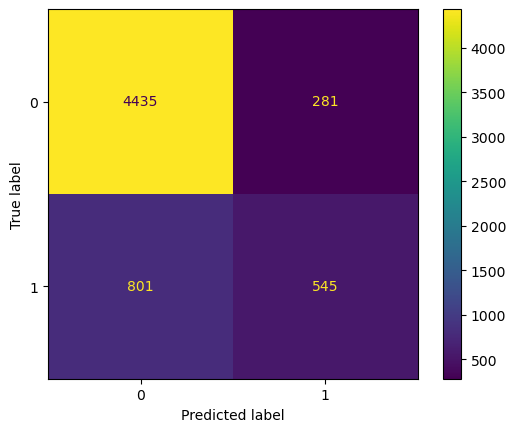

In [63]:


cmd= ConfusionMatrixDisplay(cm_t_big)
cmd=cmd.from_predictions(y_test,y_tepreds_t_big)
cmd

The confusion matrix is similar for both iterations of the tree model (293 false positives vs. 286 in final), as expected given there was only a slight improvement in training accuracy.  Compared to the baseline model, even though there are greater false positives, our greatest concern, our total correct predictions have increased.  Thus even though the tree models would incorrectly classify more unvaccinated persons and therefore result in less resources for that population, given the higher accuracy on the test set of the big_tree model and the higher number of correct predictions (and lower false negatives) in our confusion matrix, resources would be better conserved and allocated by relying on the big_tree model. 

# Results, Recommendations, Limitations. 

The results show that the big_tree model is the preferred model given its higher accuracy on the training and test sets compared to both the first tree iteration and the baseline logistic regression model.  Given that this model performs better than the other models and better than the simple strategy of guessing the majority class for each prediction, it is recommended that this model be used to predict whether or not individuals have been given the a vaccine for any virus similar to H1N1, so that resources can be allocated efficiently based on one's vaccine status.  More generally, the models show us that the three factors, presence of a doctor reccomendation, opinion of virus risk, and opinion of vaccine effectiveness, are significantly related to whether one has received the vaccine. This suggest that it would be beneficial to both increase outreach to those with low presence of these factors and to provide outreach that may could educate and provide resources so that such persons may become more likely to receive a vaccine. 

The core limitation is that there is much room for improvement in the accuracy level of the final model. While the accuracy of the final model is 82%, a strategy of simply guessing that all persons have not received the vaccine would result in a similar 79% accuracy.  Also note that iteratively, only slight improvement on models was made, given similar accuracies and only 1 more correct prediction in final model as compared to baseline.